In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
%config InlineBackend.figure_formats=['retina']

In [7]:
import pandas

In [17]:
df = pandas.read_csv("./minetestmapper/dump.txt", names=['obj', 'blkx', 'blky', 'localx','localy', 'orient'])

In [8]:
directions=['N','E','S','W']

In [18]:
def calc_x(row):
    return row['blkx'] * 16 + row['localx']
def calc_y(row):
    return row['blky'] * 16 + row['localy']

In [19]:
df['x']=df.apply (lambda row: calc_x(row), axis=1)
df['y']=df.apply (lambda row: calc_y(row), axis=1)


In [22]:
df

,obj,blkx,blky,localx,localy,orient,x,y
0,mesecons_insulated:insulated_off,0,121,1,0,3,1,1936
1,mesecons_insulated:insulated_off,0,121,1,1,3,1,1937
2,mesecons_lamp:lamp_off,0,121,1,2,1,1,1938
3,mesecons_insulated:insulated_on,0,120,0,0,3,0,1920
4,mesecons_extrawires:tjunction_on,0,120,2,0,3,2,1920
5,mesecons_extrawires:corner_on,0,120,3,0,1,3,1920
6,mesecons_insulated:insulated_off,0,120,5,0,3,5,1920
7,mesecons_insulated:insulated_off,0,120,7,0,3,7,1920
8,mesecons_insulated:insulated_on,0,120,0,1,3,0,1921
9,mesecons_insulated:insulated_on,0,120,2,1,3,2,1921


In [95]:
nonwire = df[(~df['obj'].str.contains("insulated") & (~df['obj'].str.contains("extrawires") ))]
nonwire

,obj,blkx,blky,localx,localy,orient,x,y
2,mesecons_lamp:lamp_off,0,121,1,2,1,1,1938
11,mesecons_gates:not_on,0,120,5,1,3,5,1921
14,mesecons_gates:and_on,0,120,1,2,3,1,1922
17,mesecons_gates:and_on,0,120,4,2,3,4,1922
57,mesecons_gates:not_off,0,120,5,8,3,5,1928
59,mesecons_gates:or_on,0,120,1,9,3,1,1929
62,mesecons_gates:and_off,0,120,4,9,3,4,1929
76,mesecons_gates:and_off,0,120,1,14,3,1,1934
188,mesecons_gates:and_on,0,119,1,4,3,1,1908
192,mesecons_gates:and_off,0,119,6,4,3,6,1908


In [97]:
df['obj'].unique()

array(['mesecons_insulated:insulated_off', 'mesecons_lamp:lamp_off',
       'mesecons_insulated:insulated_on',
       'mesecons_extrawires:tjunction_on',
       'mesecons_extrawires:corner_on', 'mesecons_gates:not_on',
       'mesecons_gates:and_on', 'mesecons_extrawires:crossover_on',
       'mesecons_extrawires:crossover_01',
       'mesecons_extrawires:corner_off',
       'mesecons_extrawires:crossover_10', 'mesecons_gates:not_off',
       'mesecons_gates:or_on', 'mesecons_gates:and_off',
       'mesecons_extrawires:crossover_off', 'mesecons_gates:xor_off',
       'mesecons_gates:or_off', 'mesecons_extrawires:tjunction_off',
       'mesecons_gates:xor_on', 'mesecons_walllever:wall_lever_off'],
      dtype=object)

In [42]:
nonwire['obj'].unique()

array(['mesecons_lamp:lamp_off', 'mesecons_gates:not_on',
       'mesecons_gates:and_on', 'mesecons_gates:not_off',
       'mesecons_gates:or_on', 'mesecons_gates:and_off',
       'mesecons_gates:xor_off', 'mesecons_gates:or_off',
       'mesecons_gates:xor_on', 'mesecons_walllever:wall_lever_off'],
      dtype=object)

In [110]:
def local_display(d, x,y, tx, ty):
    local_objs = np.array(d[(d['x'] > x-tx) & (d['x'] < x+tx) & (d['y'] > y-ty) & (d['y'] < y+ty)][['x','y','orient']].values)
    return local_objs
    

In [113]:
vals = local_display(df,1,1,120,120).T

In [116]:
directions=['N','E','S','W']

AttributeError: 'numpy.ndarray' object has no attribute 'map'

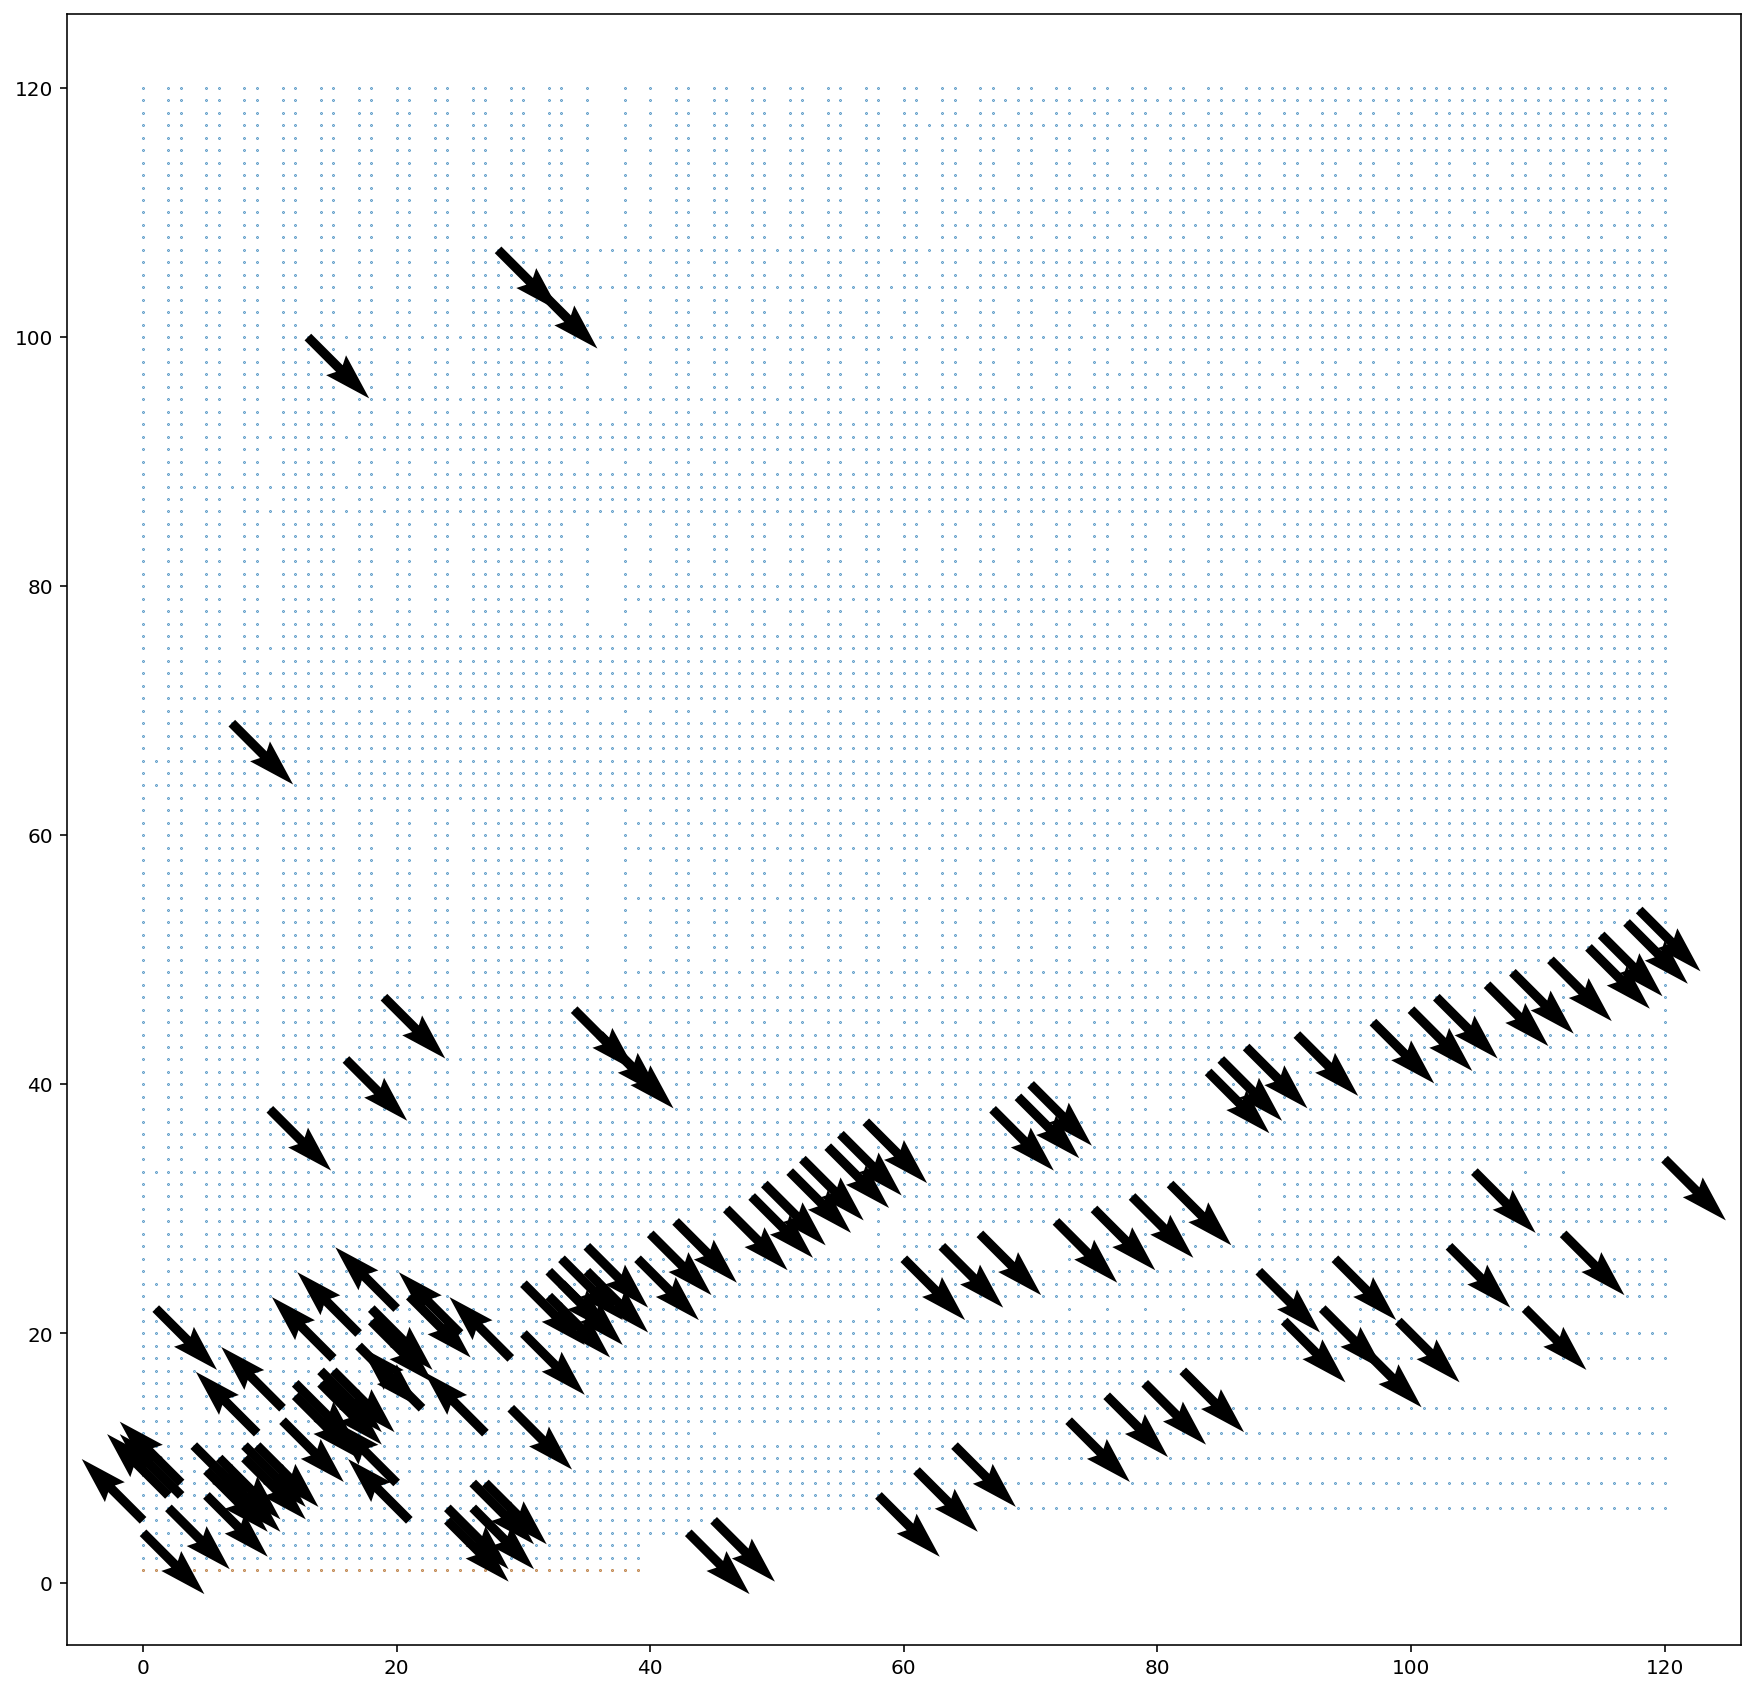

In [119]:
# 结论：corner 的 orient 指向是输出线路
plt.figure(figsize=(15,15))
plt.scatter(vals[0],vals[1],s=0.1)
lever = local_display(df[df['obj'].str.match('mesecons_walllever:wall_lever_off')],1,1,120,120).T
plt.scatter(lever[0], lever[1],s=0.1)
tcorn = local_display(df[df['obj'].str.match('mesecons_extrawires:corner')],1,1,120,120).T
plt.quiver(tcorn[0], tcorn[1],np.tan(np.pi*,( tcorn[2]+1)%2*2-1)
plt.savefig("dump.png")

In [108]:
def tracer(d, x, y):
    cur = d[(d['x'] == x) & (d['y'] == y)]
    return cur

In [109]:
tracer(df, 1, 1)

,obj,blkx,blky,localx,localy,orient,x,y
1072349,mesecons_walllever:wall_lever_off,0,0,1,1,0,1,1
